#UE03 - SPARQL Query

Please complete the 10 tasks in the `2. SPARQL` sheet of `SemAI.jar` first, and then transfer the task descriptions and your solutiosn in executable form to this notebook.

## Preparation

Reuse imports and functions from https://github.com/jku-win-dke/SemAI/blob/main/V02_SPARQL.ipynb and load the solar system graph. Query the solar system graph to check that everything works fine. 

In [ ]:
# Install required packages
!pip install -q rdflib

# Imports
import pandas as pd
from rdflib import Graph, Literal, RDF, URIRef, BNode, Namespace
from rdflib.namespace import FOAF , XSD , RDFS, NamespaceManager 

# Convenient Functions
def sparql_select(graph,query,use_prefixes=True):
  results = graph.query(query)          # execute the query against the graph, resulting in a rdflib.plugins.sparql.processor.SPARQLResult
  rows = []                             # a list of dictionaries, as intermediate format to construct the pandas DataFrame
  for result in results:                # iterate over the result set of the query, a result is an instance of rdflib.query.ResultRow
    row = {}                            #     create a dictionary to hold a single row of the result
    for var in results.vars:            #     iterate over the variables of the SPARQLResult to add a dictionary entry for each variable
      if (isinstance(result[var],URIRef) and use_prefixes):
        row[var] = result[var].n3(graph.namespace_manager)   # use namespace prefixes to shorten URIs
      else:
        row[var] = result[var]                  
    rows.append(row)                    #     add the dictionary (row) to the list 
  return pd.DataFrame(rows,columns=results.vars)        
                                        # return a pandas DataFrame constructed from the list of dictionaries, with the variables from the result set as columns      

def sparql_construct(graph, query):
  result_graph = Graph(namespace_manager = g.namespace_manager)  # create a Graph object that reuses the namespace prefixes of the original graph
  result_graph += graph.query(query)                             # execute the construct query against the original graph and add the resulting graph to the new one
  return result_graph

def sparql_ask(graph, query):
  return bool(graph.query(query))      # an ASK query has a boolean result, which should be returned as such

# Load solar system graph
g = Graph()
g.parse("https://raw.githubusercontent.com/jku-win-dke/SemAI/main/data/solarsystem.ttl",format="turtle")

# Query solar system graph (to check that everything works fine)
df = sparql_select(g,"""
  SELECT ?planet ?apoapsis ?apoapsis_uom
  WHERE { 
    ?planet rdf:type dbo:Planet . 
    OPTIONAL { ?planet v:apoapsis [rdf:value ?apoapsis ; v:uom ?apoapsis_uom ].  }
  }
""")
df


## Task 1 (1 pt)

Geben Sie alle Zwergplaneten (Instanzen der Klasse dbo:DwarfPlanet) aus und falls vorhanden deren genaue Entsprechung (skos:exactMatch). Ordnen Sie das Ergebnis aufsteigend nach den URIs der Zwergplaneten.


```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

SELECT *
WHERE { 
?d a dbo:DwarfPlanet. #or rdf:type
OPTIONAL{?d skos:exactMatch ?match .} 
  }
ORDER BY ?d
```



Example DwarfPlanet in Graph:

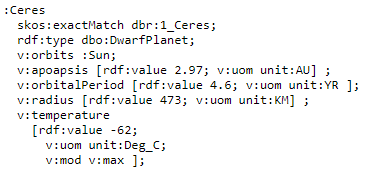

Result:

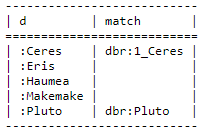

In [ ]:
# TODO: include and execute the query, display the result

df = sparql_select(g,"""
  SELECT *
  WHERE { 
  ?d a dbo:DwarfPlanet. #or rdf:type
  OPTIONAL{?d skos:exactMatch ?match .} 
    }
  ORDER BY ?d
""")
df

## Task 2 (1 pt)

Ermitteln Sie alle Sterne, ihr exactMatch, und ihre Masse (geben Sie den Wert und die Maßeinheit aus). Ordnen Sie das Ergebnis nach der URI der Sterne


```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

SELECT *
WHERE { ?star rdf:type dbo:Star; 
              skos:exactMatch ?match;
v:mass[rdf:value ?massVal; v:uom ?massUoM] .
}
ORDER BY ?star
```



Example Star in Graph:

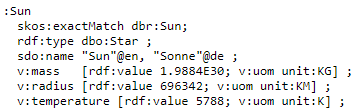

Result:

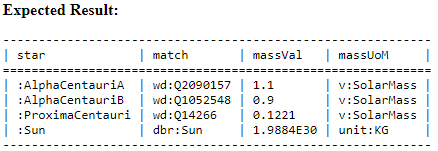

In [ ]:
df = sparql_select(g,"""
  SELECT *
  WHERE { ?star rdf:type dbo:Star; 
                skos:exactMatch ?match;
  v:mass[rdf:value ?massVal; v:uom ?massUoM] .
  }
  ORDER BY ?star
""")
df

## Task 3 (1 pt)

Die Planeten unseres Sonnensystems und ihre jeweilige Anzahl an Monden. Unterscheiden Sie die im RDF-Graph beschriebenen Monde und die im RDF-Graph erfasste Anzahl von Monden. Sortieren Sie nach den Planeten.



```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

SELECT ?planet ?assertedNo (count(?x) AS ?noOfDescribedMoons)

WHERE { 
?planet rdf:type dbo:Planet ;
        v:orbits :Sun ;
        v:nrOfMoons ?assertedNo .
OPTIONAL{?planet ^ v:orbits ?x .}

  }
GROUP BY ?planet ?assertedNo
ORDER BY ?planet
```



Example Planet Orbiting Sun in Graph:

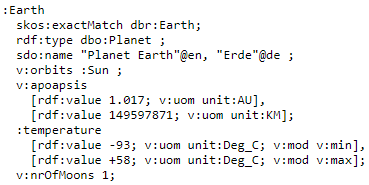

Example Moons in Graph:

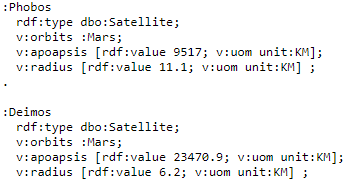

Result:

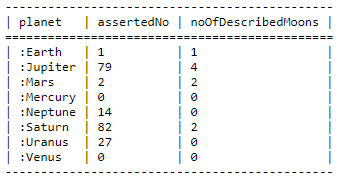

In [ ]:
df = sparql_select(g,"""
  SELECT ?planet ?assertedNo (count(?x) AS ?noOfDescribedMoons)

  WHERE { 
  ?planet rdf:type dbo:Planet ;
          v:orbits :Sun ;
          v:nrOfMoons ?assertedNo .
  OPTIONAL{?planet ^ v:orbits ?x .}

    }
  GROUP BY ?planet ?assertedNo
  ORDER BY ?planet
""")
df

## Task 4 (1 pt)

Ermitteln sie für die Planeten in unserem Sonnensystem die durchschnittliche Anzahl an Monden (die auch im RDF-Graph beschrieben sind) pro Planet.



```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

SELECT (avg(?noOfMoons) AS ?avgNoOfDescribedMoons )
WHERE 
{ 
  ?planet rdf:type dbo:Planet ; #or "a"
          v:orbits :Sun . 
  {
    SELECT (count(?moon) AS ?noOfMoons)
    WHERE 
    {
      ?p rdf:type dbo:Planet .
      OPTIONAL{?moon v:orbits ?p.}
      #OR: OPTIONAL { ?p ^ v:orbits ?moon .}

    } 
    GROUP BY ?p
  }

}
```



Example Earth in Graph:

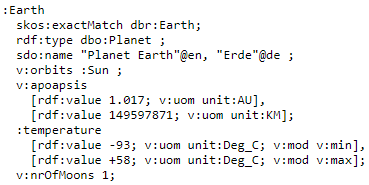

Example Moons in Graph:

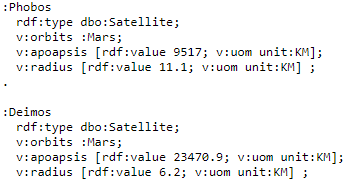

Result:

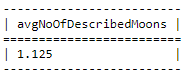

In [ ]:
df = sparql_select(g,"""
  SELECT (avg(?noOfMoons) AS ?avgNoOfDescribedMoons )
  WHERE 
  { 
    ?planet rdf:type dbo:Planet ; #or "a"
            v:orbits :Sun . 
    {
      SELECT (count(?moon) AS ?noOfMoons)
      WHERE 
      {
        ?p rdf:type dbo:Planet .
        OPTIONAL{?moon v:orbits ?p.}
        #OR: OPTIONAL { ?p ^ v:orbits ?moon .}

      } 
      GROUP BY ?p
    }

  }
""")
df

## Task 5 (1 pt)

Geben Sie die im RDF-Graph verwendeten Klassen und ihre Anzahl an Instanzen aus. Geben Sie nur Klassen mit mindestens 2 Instanzen aus. Ordnen Sie die Ausgabe nach der URI der Klassen.



```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

SELECT ?class (count(?class) as ?noOfInstances )
WHERE { 
  ?x rdf:type ?class
}
GROUP BY ?class
HAVING (?noOfInstances >= 2)
ORDER BY ?class

```



Example Class in Graph:

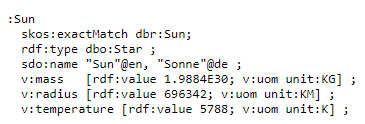

Result:

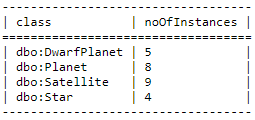

In [ ]:
df = sparql_select(g,"""
  SELECT ?class (count(?class) as ?noOfInstances )
  WHERE { 
    ?x rdf:type ?class
  }
  GROUP BY ?class
  HAVING (?noOfInstances >= 2)
  ORDER BY ?class
""")
df

## Task 6 (1 pt)

Geben Sie die im RDF-Graph verwendeten Properties und ihre Häufigkeit je Klasse aus. Gezählt werden sollen die Instanzen der Klasse, die die Property ausprägen. Geben Sie nur Properties zu Klassen aus, die von mindestens 7 Instanzen dieser Klasse ausgeprägt werden. Ordnen Sie die Ausgabe zuerst nach der Klasse und dann nach der Property.



```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

SELECT ?class ?prop (count(DISTINCT ?inst) as ?noOfInstances)
WHERE { 
  ?inst a ?class . # OR: rdf:type
  ?inst ?prop ?obj .
}
GROUP BY ?class ?prop
HAVING (?noOfInstances >= 7)
ORDER BY ?class ?prop
```



Example Instance with Properties:

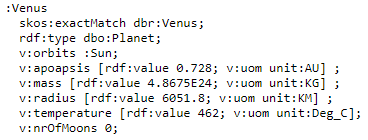

Result:

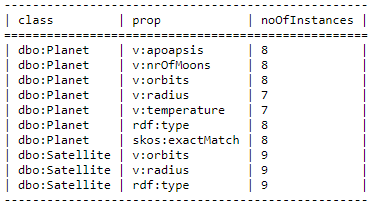

In [ ]:
df = sparql_select(g,"""
  SELECT ?class ?prop (count(DISTINCT ?inst) as ?noOfInstances)
  WHERE { 
    ?inst a ?class . # OR: rdf:type
    ?inst ?prop ?obj .
  }
  GROUP BY ?class ?prop
  HAVING (count(DISTINCT ?inst) >= 7)
  ORDER BY ?class ?prop
  
""")
df

## Task 7 (1 pt)

Ermitteln Sie alle Sterne, sowie alle Monde. Zu jedem Mond ermitteln Sie auch den Planet, den dieser Mond umrundet. Ordnen Sie die Ausgabe nach der URI der Sterne und Monde.



```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

SELECT *
WHERE { 
  { ?x rdf:type dbo:Star. }
  UNION  
  { ?x rdf:type dbo:Satellite. 
    ?y a dbo:Planet .
    ?x v:orbits ?y 
  }

}
ORDER BY ?x
```



Example Moon:

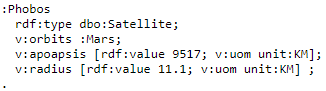

Result:

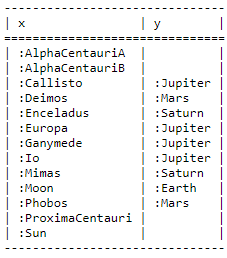

In [ ]:
df = sparql_select(g,"""
  SELECT *
  WHERE { 
    { ?x rdf:type dbo:Star. }
    UNION  
    { ?x rdf:type dbo:Satellite. 
      ?y a dbo:Planet .
      ?x v:orbits ?y 
    }

  }
  ORDER BY ?x
""")
df

## Task 8 (1 pt)

Erzeugen sie mittels einer Construct-Query den angezeigten RDF-GRAPH (Expected Result). Reihenfolge ist unerheblich.


NOCH NICHT RICHTIG!

```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:     <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

CONSTRUCT 
{
  ?him a v:Himmelskoerper .
  ?h v:wirdUmrundetVon ?y . 
}
WHERE 
{  
 { ?him a dbo:Planet . }
 UNION
 { ?him a dbo:Satellite . }

 OPTIONAL {?y a ?type}  # hier bin ich mir unsicher wieso es nicht ohne dieses stmt geht.

 OPTIONAL {?y v:orbits ?h ; a dbo:Planet .
 }
 OPTIONAL {?y v:orbits ?h ; a dbo:Satellite  .
 }
}
```



Result:

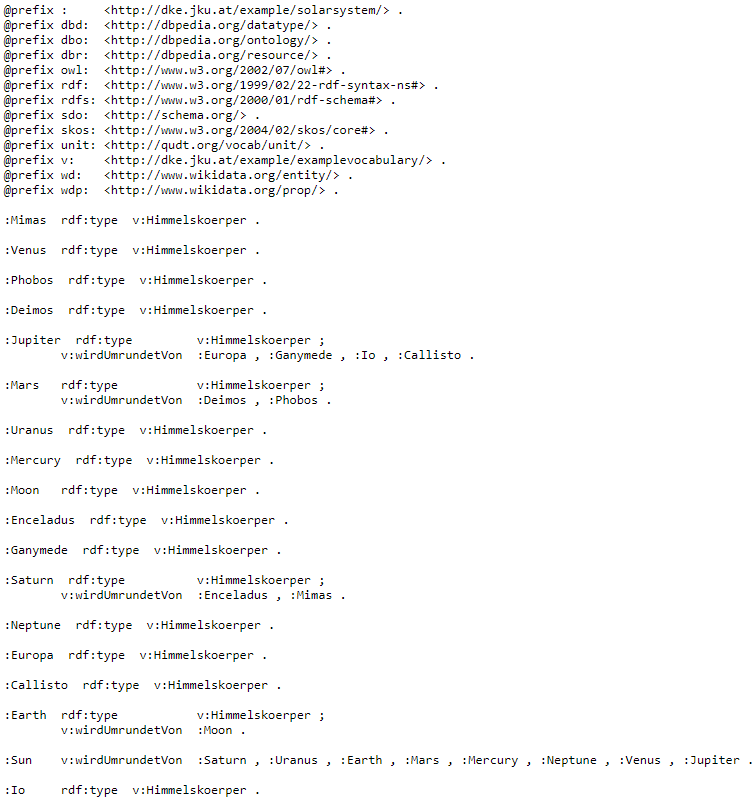

In [ ]:
df = sparql_construct(g,"""
  CONSTRUCT 
  {
    ?him a v:Himmelskoerper .
    ?h v:wirdUmrundetVon ?y . 
  }
  WHERE 
  {  
  { ?him a dbo:Planet . }
  UNION
  { ?him a dbo:Satellite . }

  OPTIONAL {?y a ?type}  # hier bin ich mir unsicher wieso es nicht ohne dieses stmt geht.

  OPTIONAL {?y v:orbits ?h ; a dbo:Planet .
  }
  OPTIONAL {?y v:orbits ?h ; a dbo:Satellite  .
  }
  }
""")
print(df.serialize())

## Task 9 (1 pt)

Gibt es einen Stern im RDF-Graph, der massereicher als die Sonne ist.


```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

ASK {  
  ?x a dbo:Star .
  ?x v:mass [rdf:value ?mass; v:uom v:SolarMass] 
  FILTER (?mass > 1) # SolarMass 1 equals mass of Sun. SolarMass > 1 has mass larger than Sun
}
```



Example Star in Graph:

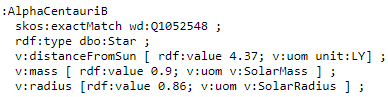

Result:

image.png


Result for SELECT * WHERE:

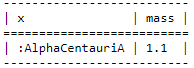

In [ ]:
df = sparql_ask(g,"""
  ASK {  
    ?x a dbo:Star .
    ?x v:mass [rdf:value ?mass; v:uom v:SolarMass] 
    FILTER (?mass > 1) # SolarMass 1 equals mass of Sun. SolarMass > 1 has mass larger than Sun
  }
""")
df

## Task 10 (1 pt)

Geben Sie eine Beschreibung der Resourcen aus, die einen Durchmesser zwischen 20.000 km und 30.000 km haben.


```
base         <http://dke.jku.at/example/>
prefix :     <http://dke.jku.at/example/solarsystem/>
prefix v:    <http://dke.jku.at/example/examplevocabulary/>
prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr:  <http://dbpedia.org/resource/>
prefix dbo:  <http://dbpedia.org/ontology/>
prefix dbd:	 <http://dbpedia.org/datatype/>
prefix sdo:  <http://schema.org/>
prefix wd:   <http://www.wikidata.org/entity/>
prefix wdp:  <http://www.wikidata.org/prop/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>
prefix unit: <http://qudt.org/vocab/unit/>
prefix owl:  <http://www.w3.org/2002/07/owl#>

DESCRIBE * 
WHERE { 
  ?resource v:radius [rdf:value ?radius; v:uom unit:KM] .
  FILTER (?radius >20000 && ?radius <30000)
}
```



Example Resource in Graph:

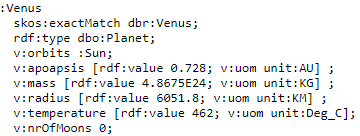

Result:

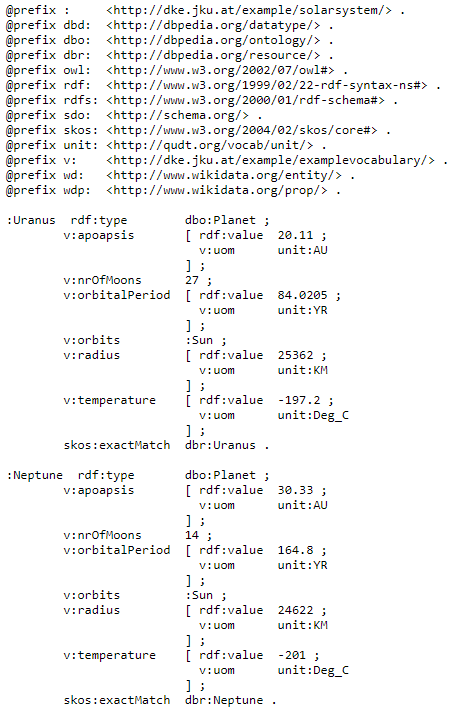

In [ ]:
df = sparql_construct(g,"""
  DESCRIBE ?resource
  WHERE { 
    ?resource v:radius [rdf:value ?radius; v:uom unit:KM] .
    FILTER (?radius >=20000 && ?radius <=30000)
  }
""")

print(df.serialize())